In [205]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import scipy.optimize as opt
import math
# import csv
from matplotlib import rc, rcParams

HEADER###################################################################################################

HEADER### CosmicWatch: The Desktop Muon Detector

HEADER### Device ID: DorothyHodgkin2

HEADER### Launch time: 0:00:05 1/1/2019

HEADER### Questions? Email Spencer N. Axani (saxani@mit.edu)

HEADER### Event Time Date TimeStamp[ms] ADC1 ADC2 SiPM[mV] Temp[C] Pressure[Pa] DeadTime[us] Coincident ID

HEADER###################################################################################################

First line of data in file: [['1', '0:00:06', '1/1/2019 ', '170', '64.00', '9.00', '5.92', '24.32', '102165.39', '48034', '0', 'DorothyHodgkin2', '\n']]
23116
First data point at : ['1', '0:00:06', '1/1/2019 ', 170, '64.00', '9.00', '5.92', '24.32', '102165.39', '48034', '0', 'DorothyHodgkin2', '\n']
Last data point at : ['23116', '2:46:46', '1/1/2019', 10000470, '67.00', '7.00', '5.94', '29.35', '102245.89', '1836', '0', 'DorothyHodgkin2']
[15, 18, 20, 23, 25, 28, 24, 18, 23, 22, 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


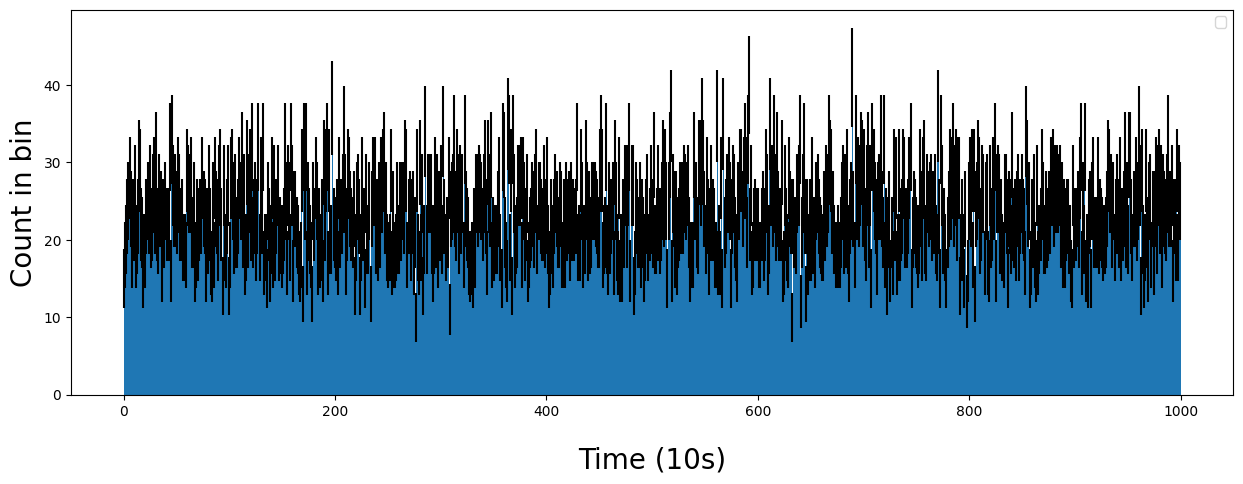

[5.000e-01 1.500e+00 2.500e+00 3.500e+00 4.500e+00 5.500e+00 6.500e+00
 7.500e+00 8.500e+00 9.500e+00 1.050e+01 1.150e+01 1.250e+01 1.350e+01
 1.450e+01 1.550e+01 1.650e+01 1.750e+01 1.850e+01 1.950e+01 2.050e+01
 2.150e+01 2.250e+01 2.350e+01 2.450e+01 2.550e+01 2.650e+01 2.750e+01
 2.850e+01 2.950e+01 3.050e+01 3.150e+01 3.250e+01 3.350e+01 3.450e+01
 3.550e+01 3.650e+01 3.750e+01 3.850e+01 3.950e+01 4.050e+01 4.150e+01
 4.250e+01 4.350e+01 4.450e+01 4.550e+01 4.650e+01 4.750e+01 4.850e+01
 4.950e+01 5.050e+01 5.150e+01 5.250e+01 5.350e+01 5.450e+01 5.550e+01
 5.650e+01 5.750e+01 5.850e+01 5.950e+01 6.050e+01 6.150e+01 6.250e+01
 6.350e+01 6.450e+01 6.550e+01 6.650e+01 6.750e+01 6.850e+01 6.950e+01
 7.050e+01 7.150e+01 7.250e+01 7.350e+01 7.450e+01 7.550e+01 7.650e+01
 7.750e+01 7.850e+01 7.950e+01 8.050e+01 8.150e+01 8.250e+01 8.350e+01
 8.450e+01 8.550e+01 8.650e+01 8.750e+01 8.850e+01 8.950e+01 9.050e+01
 9.150e+01 9.250e+01 9.350e+01 9.450e+01 9.550e+01 9.650e+01 9.750e+01
 9.850

In [206]:
with open('DorothyFileC050.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    line = file.readline()
    while line[0] == "#":
        print("HEADER" + line)
        line = file.readline()
        # print header
    # Check to make sure first line of data is correct
    data1 = [line.split(sep="\t")]
    print("First line of data in file: " + str(data1))
    data1[0][3] = int(data1[0][3])
    # Check time is at this index
    time = data1[0][3]
    numIntervals = 1000
    intervalTime = 10 #Range in seconds

    # Alex 18/09 NOTE This function will crash for index out of range, and may run indefinitely in the case of data with bad time.
    while time < (numIntervals * intervalTime * 1000): # Data is in ms 
        data1 += [file.readline().split()]
        data1[-1][3] = int(data1[-1][3])
        time = data1[-1][3]

# Bin function graciously borrowed from pythonForJLAB https://github.mit.edu/juniorlab/Python-Intro/blob/master/pythonForJLAB.ipynb

# Take out zero bins. The discussion for why I do this is beyond the scope of this intro, ask the instructors
# It's not important to know what's going on in this function if you don't want to know.
# If you do want to know, you'll have to think about it
# Alex 18/09 For a time interval of 10s, its really unlikely that we will get empty bins but we should do this for robustness.
def delete_zeros(bins,counts,err):
    '''
    Inputs:
    bins = the frequency bin centers
    counts = the frequency data
    err = the error data
    Output:
    new_bins = bin centers, but if the frequency of a bin center is zero the bin is removed
    new_counts = frequency data, but if "                    "
    new_err = error data, but if "                       "
    '''
    zeros = np.where(counts==0) # Find the indices where the frequency data is zero
    mask = np.ones(len(counts),dtype=bool) # create a mask of True values
    mask[zeros[0]] = False # Turn the zero parts of the mask False
    print(counts[mask])
    new_counts = counts[mask] # Recreate the bin data without the False parts
    new_bins = bins[mask] # Recreate the frequency data without the False parts
    new_err = err[mask] # Recrete the "      "
    return new_bins, new_counts, new_err

print(len(data1))
print("First data point at : " + str(data1[0]))
print("Last data point at : " + str(data1[-1]))

ind = 0
bin_counts = []
# Left edge must start at time = 0, right most edge is our recording limit so will be the number of intervals * intervalTime * unit conversion
bin_edges_1 = np.arange(0,numIntervals + 1)

for interval in range(1, numIntervals + 1):
    count = 0
    while data1[ind][3] < interval * 1000 * intervalTime:
        count += 1
        ind += 1

    bin_counts += [count]

plt.rcParams["figure.figsize"] = (15,5)
print(bin_counts)
filter_bin_centers, filter_counts, filter_err = delete_zeros( bins = (np.arange(0,numIntervals) + np.ones(numIntervals)*0.5), counts = np.array(bin_counts), err = np.sqrt(bin_counts))
# plt.bar takes bin centers as its arg, not edges.
plt.bar(filter_bin_centers, filter_counts, width = 1, yerr=filter_err)
plt.xlabel(r'Time ({0}s)'.format(intervalTime), fontsize=20, labelpad=20)
plt.ylabel(r'Count in bin', fontsize=20)
plt.legend()
plt.show()
print(filter_bin_centers)
print(filter_counts)
print(filter_err)
# Update num intervals to num of non zero bins
numIntervals = len(filter_counts)
# lines = [line.strip() for line in lines]
# data = [int(line) for line in lines if line.isdigit()]
# print(data)

In [207]:
# Plotting cumulative mean and demonstrating the reduction in error
cumulativeaverage = np.cumsum(filter_counts) / np.arange(1, numIntervals + 1)
# For Poisson, Var = mean, so this is the std on the mean. Err per bar is stored in filter_err
stds = np.sqrt(cumulativeaverage / np.arange(1, numIntervals + 1))

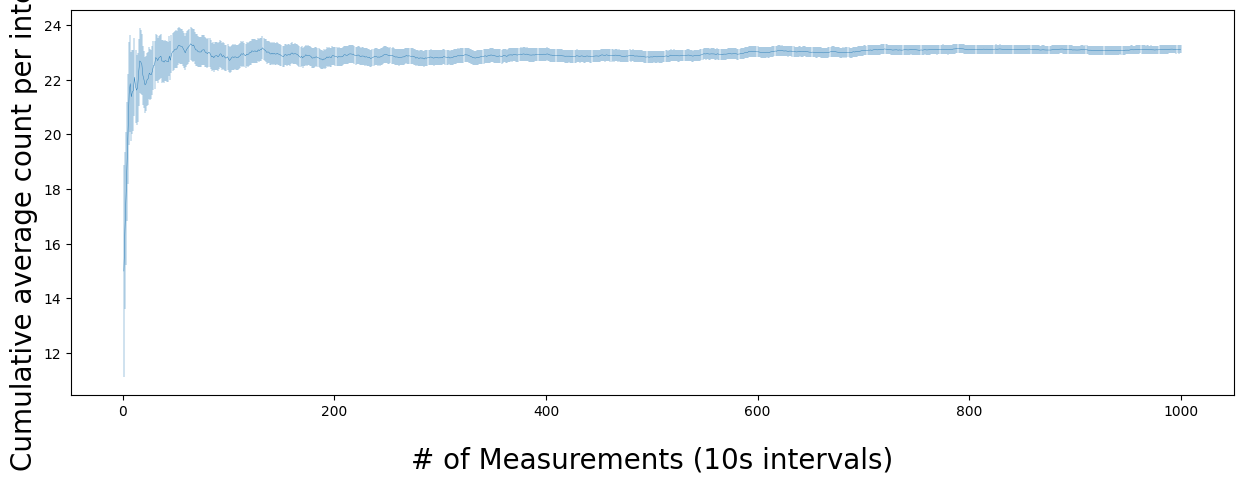

In [208]:
plt.errorbar(np.arange(1, numIntervals+1), cumulativeaverage, yerr = stds, lw=0.3)
plt.xlabel(r'# of Measurements ({0}s intervals)'.format(intervalTime), fontsize=20, labelpad=20)
plt.ylabel(r'Cumulative average count per interval', fontsize=20)
plt.show()

vals: 31, edges: 32 
bin values: [ 2.  1.  2.  5. 10. 21. 31. 39. 59. 65. 71. 77. 80. 90. 71. 76. 66. 57.
 49. 42. 20. 15. 21. 15.  5.  4.  3.  1.  0.  0.  2.]


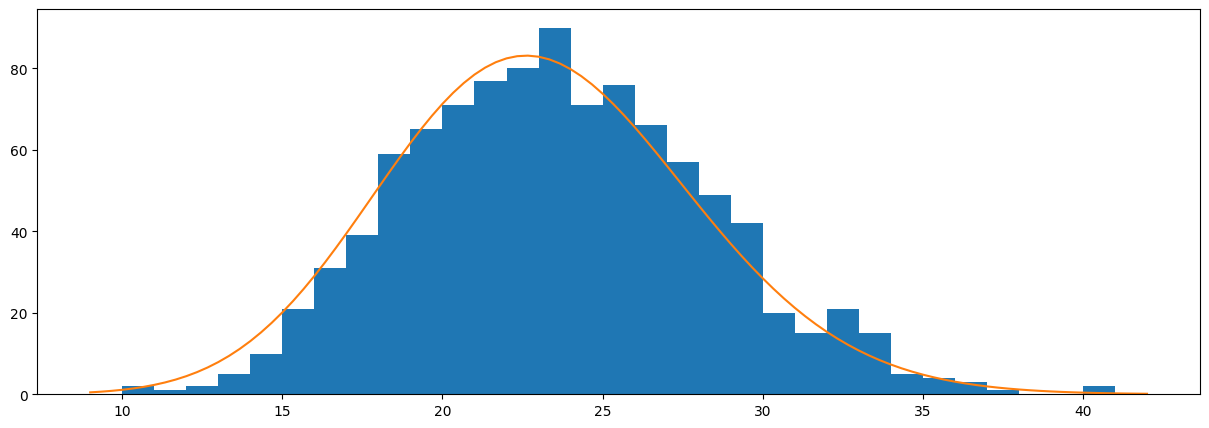

[ 2.  1.  2.  5. 10. 21. 31. 39. 59. 65. 71. 77. 80. 90. 71. 76. 66. 57.
 49. 42. 20. 15. 21. 15.  5.  4.  3.  1.  2.]


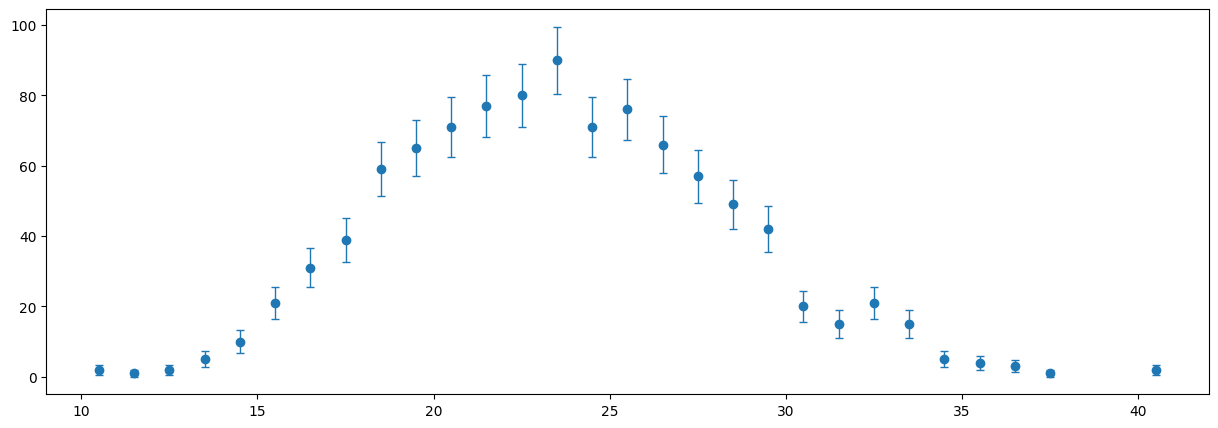

In [209]:
# Also from PythonForJLAB
def poisson(x, lam, a):
    '''
    Inputs:
    a = normalization constant
    x = corresponding number of events, should be an array
    lam = expected value, which is equal to the variance for poisson distribution
    Outputs: probability of x number of events occuring, scaled by constant a
    '''
    return a * lam**x * np.exp(-lam)/factorial(x)

count_range = (filter_counts.min(),filter_counts.max()+1)

binvalues, binedges2, patches = plt.hist(filter_counts, np.arange(count_range[0], count_range[1]))
print("vals: {0}, edges: {1} ".format(len(binvalues), len(binedges2)))
print("bin values: " + str(binvalues))
x = np.linspace(filter_counts.min()-1,filter_counts.max()+1,100)

plt.plot(x, poisson(x, cumulativeaverage[-1], numIntervals))
plt.show()
centers = binedges2[0:len(binedges2)-1] + np.ones(len(binedges2)-1)*0.5
err = np.sqrt(binvalues)
# Remove new zero bins from hsit
new_cent, new_val, new_err = delete_zeros(centers, binvalues, err)

10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 40.5
2.0 1.0 2.0 5.0 10.0 21.0 31.0 39.0 59.0 65.0 71.0 77.0 80.0 90.0 71.0 76.0 66.0 57.0 49.0 42.0 20.0 15.0 21.0 15.0 5.0 4.0 3.0 1.0 2.0
1.4142135623730951 1.0 1.4142135623730951 2.23606797749979 3.1622776601683795 4.58257569495584 5.5677643628300215 6.244997998398398 7.681145747868608 8.06225774829855 8.426149773176359 8.774964387392123 8.94427190999916 9.486832980505138 8.426149773176359 8.717797887081348 8.12403840463596 7.54983443527075 7.0 6.48074069840786 4.47213595499958 3.872983346207417 4.58257569495584 3.872983346207417 2.23606797749979 2.0 1.7320508075688772 1.0 1.4142135623730951


C:\Users\alexa\AppData\Local\Temp\ipykernel_29340\1282718062.py:10: RuntimeWarning: divide by zero encountered in divide
  return a * lam**x * np.exp(-lam)/factorial(x)


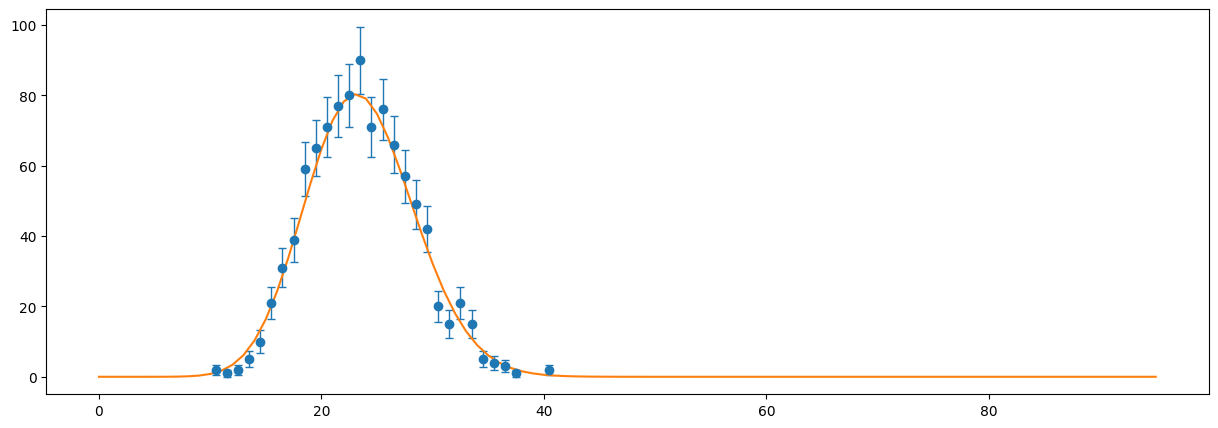

popt, pcov, uncert: [ 23.62363662 977.19353355], [[2.24460898e-02 2.64643732e-02]
 [2.64643732e-02 9.80594851e+02]],[ 0.14982019 31.31445115]


In [217]:
#np.sum((poisson(bincenters, cumulativeaverage[-1], numIntervals * 50 / 29) - binvalues[0]) ** 2 / ((np.sqrt(cumulativeaverage[-1])) ** 2))
print(*new_cent)
print(*new_val)
print(*new_err)
popt, pcov = opt.curve_fit(f=poisson, xdata=new_cent, ydata=new_val, sigma=new_err, p0=[5,200], absolute_sigma=True, maxfev = 100000) # Fit function
uncert = np.sqrt(np.diag(pcov)) # Extract uncertainty from fit
plt.errorbar(new_cent, new_val, yerr = new_err, linewidth=1, ls='none', fmt='o', capsize=3) # Plot actual data
x = np.linspace(start=new_val.min()-5,stop=new_val.max()+5,num=100,endpoint=True) # Define x for smoother plotting of our poisson fit function

plt.plot(x, poisson(x, popt[0], popt[1])) # Plot fit function

plt.show()
print("popt, pcov, uncert: " + str(popt) +", "+ str(pcov) +","+ str(uncert))

In [214]:
# Time to calculate chi2

def chisq(func,popt,x,y,sig):
    '''
    Inputs:
    func = function to generate expected value
    x = x data
    y = y data
    sig = sigma data
    Outputs:
    chi2 = chi-squared value
    '''
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

chi2 = chisq(poisson,popt,new_cent,new_val,new_err)
print(chi2)
dof = len(new_cent)-2
chi2_probs = 1 - stats.chi2.cdf(chi2,dof)
print(chi2_probs)


26.164920636527288
0.5094624770220334
